In [39]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Rough Work

In [2]:
goldd = pd.read_excel (r'/Users/viveksuresh/Documents/learning center/Analytics/Gold Price/Gold_Prices(py).xlsx')
goldd.describe()

,Year,US dollar,Cad dollar,US Interest Rate,BTC,CPI
count,10901.000000,10901.000000,10899.000000,10901.000000,1581.000000,351.000000
mean,1999.386937,671.093160,814.053722,6.423798,4460.410309,71.222995
std,12.062703,450.864223,511.558116,3.748716,4160.990783,22.158839
min,1978.000000,216.850000,256.830000,0.220000,178.102997,28.816498
25%,1989.000000,351.000000,453.290000,3.990000,435.509003,51.916107
50%,1999.000000,412.400000,531.640000,5.590000,3654.833496,70.121552
75%,2010.000000,1109.850000,1231.555000,8.320000,8043.951172,91.433948
max,2020.000000,2067.150000,2749.310000,22.360000,19114.199219,108.577022


In [3]:
goldd.corr()

,Year,US dollar,Cad dollar,US Interest Rate,BTC,CPI
Year,1.000000,0.772654,0.798347,-0.794247,0.800372,0.998269
US dollar,0.772654,1.000000,0.974402,-0.530724,0.656738,0.761539
Cad dollar,0.798347,0.974402,1.000000,-0.519079,0.636533,0.790227
US Interest Rate,-0.794247,-0.530724,-0.519079,1.000000,0.163874,-0.787113
BTC,0.800372,0.656738,0.636533,0.163874,1.000000,0.778872
CPI,0.998269,0.761539,0.790227,-0.787113,0.778872,1.000000


# Scatter Plot

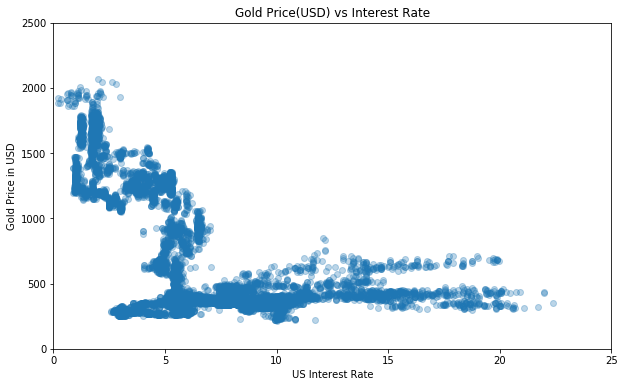

In [4]:
x = DataFrame(goldd, columns = ['US Interest Rate'])
y = DataFrame(goldd, columns = ['US dollar'])

plt.figure(figsize = (10,6))
plt.scatter(x,y,alpha = 0.3)
plt.title("Gold Price(USD) vs Interest Rate")
plt.ylabel("Gold Price in USD")
plt.xlabel("US Interest Rate")
plt.ylim(0,2500)
plt.xlim(0, 25)
plt.show()

In [5]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
#theta_1
reg.coef_

array([[-63.83104936]])

In [7]:
#intercept
reg.intercept_

array([1081.13091575])

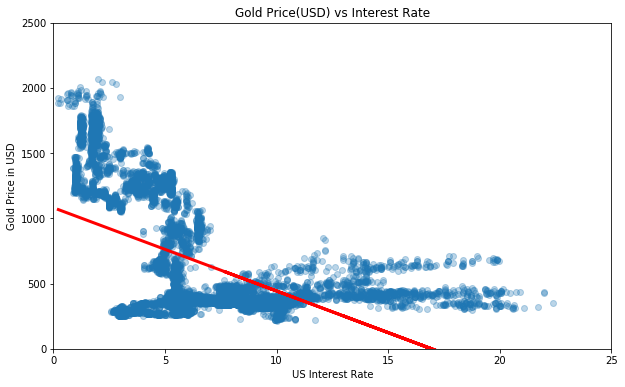

In [8]:
plt.figure(figsize = (10,6))
plt.scatter(x,y, alpha = 0.3)
plt.plot(x, reg.predict(x), color = 'red', linewidth = 3)

plt.title("Gold Price(USD) vs Interest Rate")
plt.ylabel("Gold Price in USD")
plt.xlabel("US Interest Rate")
plt.ylim(0,2500)
plt.xlim(0, 25)
plt.show()

In [9]:
reg.score(x,y)

0.28166801942269504

In [10]:
x2 = np.array(x)
y2 = np.array(y)

In [11]:
y_hat = 1081.13091575 + (-63.83104936) * x2


In [12]:
# MSE function
def mse(y,y_hat):
    return 1/len(y2) * sum((y - y_hat)**2)    

In [13]:
print("mse: ", mean_squared_error(y2,y_hat))
print("mse:",mean_squared_error(y2,reg.predict(x2)))

mse:  146008.08672904357
mse: 146008.08672904357


In [14]:
goldd.shape

(10901, 7)

# Visual Analysis

In [99]:
data = pd.DataFrame(data=goldd)
data = data.drop('Date',axis=1)
data.head

<bound method NDFrame.head of        Year  US dollar  Cad dollar  US Interest Rate           BTC        CPI
0      1978     226.00         NaN             10.84           NaN        NaN
1      1979     226.00         NaN             10.84           NaN  28.816498
2      1979     226.80      263.74             10.84           NaN        NaN
3      1979     218.60      264.39             10.84           NaN        NaN
4      1979     223.15      264.14             11.72           NaN        NaN
5      1979     225.50      268.39              8.34           NaN        NaN
6      1979     223.10      269.53             10.03           NaN        NaN
7      1979     224.00      266.30              9.94           NaN        NaN
8      1979     220.70      261.79              9.94           NaN        NaN
9      1979     220.65      262.51              9.94           NaN        NaN
10     1979     217.60      257.19             10.01           NaN        NaN
11     1979     216.85      256.83

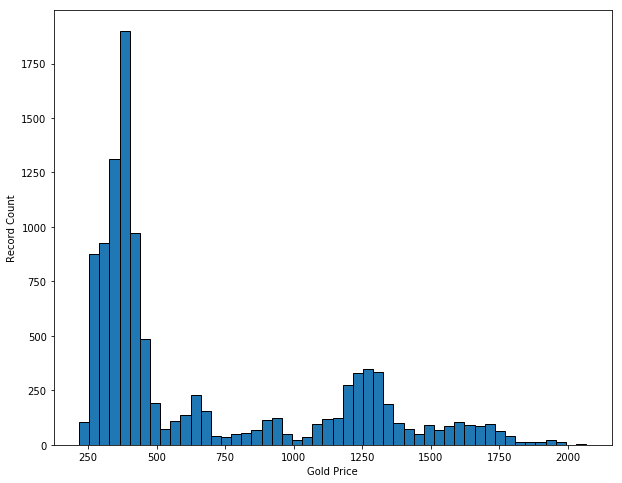

In [16]:
plt.figure(figsize=(10,8))
plt.hist(data['US dollar'],bins=50,ec='black')
plt.xlabel('Gold Price')
plt.ylabel('Record Count')
plt.show()

/Users/viveksuresh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


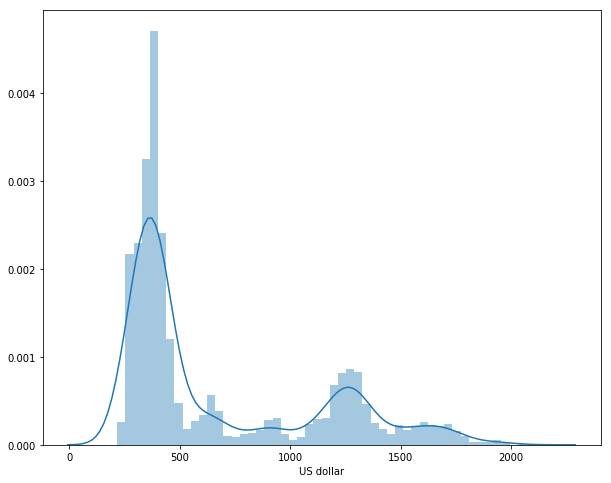

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(data['US dollar'],bins=50)
plt.show()

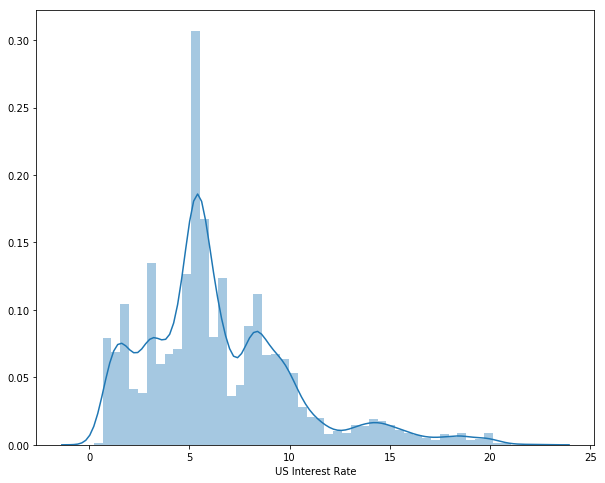

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(data['US Interest Rate'],bins=50)

In [100]:
data.mean()

Year                1999.386937
US dollar            671.093160
Cad dollar           814.053722
US Interest Rate       6.423798
BTC                 4460.410309
CPI                   71.222995
dtype: float64

In [101]:
data.median()

Year                1999.000000
US dollar            412.400000
Cad dollar           531.640000
US Interest Rate       5.590000
BTC                 3654.833496
CPI                   70.121552
dtype: float64

In [102]:
data.describe()

,Year,US dollar,Cad dollar,US Interest Rate,BTC,CPI
count,10901.000000,10901.000000,10899.000000,10901.000000,1581.000000,351.000000
mean,1999.386937,671.093160,814.053722,6.423798,4460.410309,71.222995
std,12.062703,450.864223,511.558116,3.748716,4160.990783,22.158839
min,1978.000000,216.850000,256.830000,0.220000,178.102997,28.816498
25%,1989.000000,351.000000,453.290000,3.990000,435.509003,51.916107
50%,1999.000000,412.400000,531.640000,5.590000,3654.833496,70.121552
75%,2010.000000,1109.850000,1231.555000,8.320000,8043.951172,91.433948
max,2020.000000,2067.150000,2749.310000,22.360000,19114.199219,108.577022


In [22]:
data.corr()

,Year,US dollar,Cad dollar,US Interest Rate,BTC,CPI
Year,1.000000,0.772654,0.798347,-0.794247,0.800372,0.998269
US dollar,0.772654,1.000000,0.974402,-0.530724,0.656738,0.761539
Cad dollar,0.798347,0.974402,1.000000,-0.519079,0.636533,0.790227
US Interest Rate,-0.794247,-0.530724,-0.519079,1.000000,0.163874,-0.787113
BTC,0.800372,0.656738,0.636533,0.163874,1.000000,0.778872
CPI,0.998269,0.761539,0.790227,-0.787113,0.778872,1.000000


In [23]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

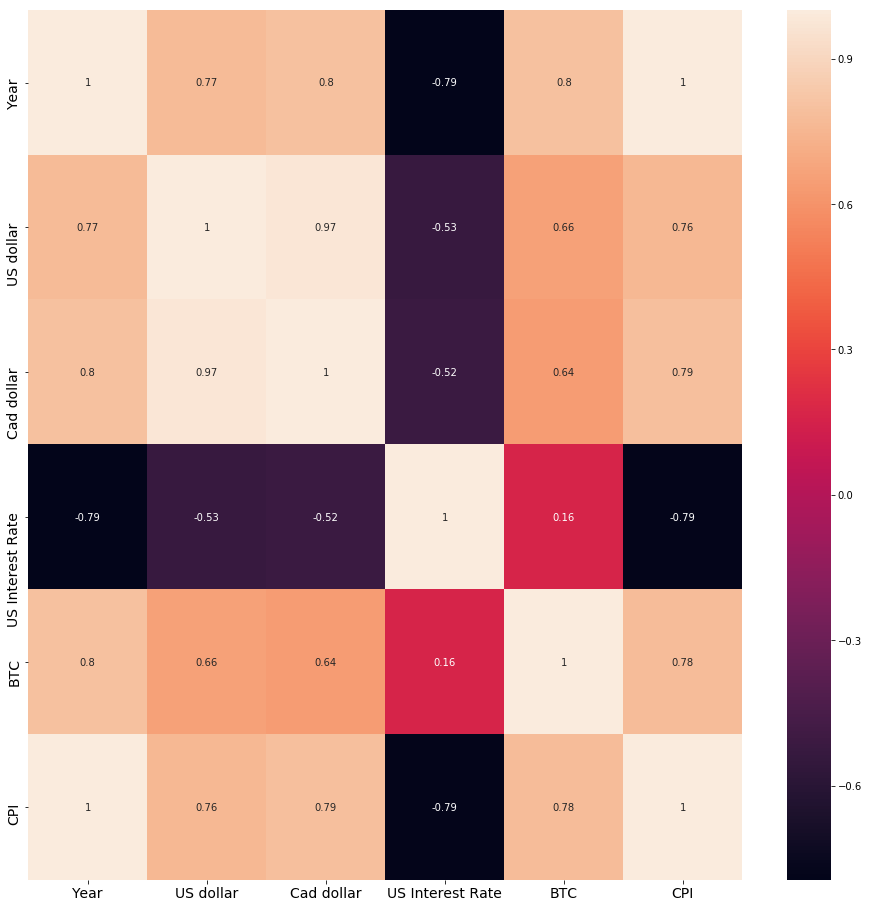

In [24]:
plt.figure(figsize = (16,16))
sns.heatmap(data.corr(),annot = True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

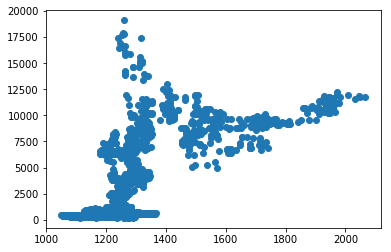

In [25]:
plt.scatter(data['US dollar'],data['BTC'])
plt.show()

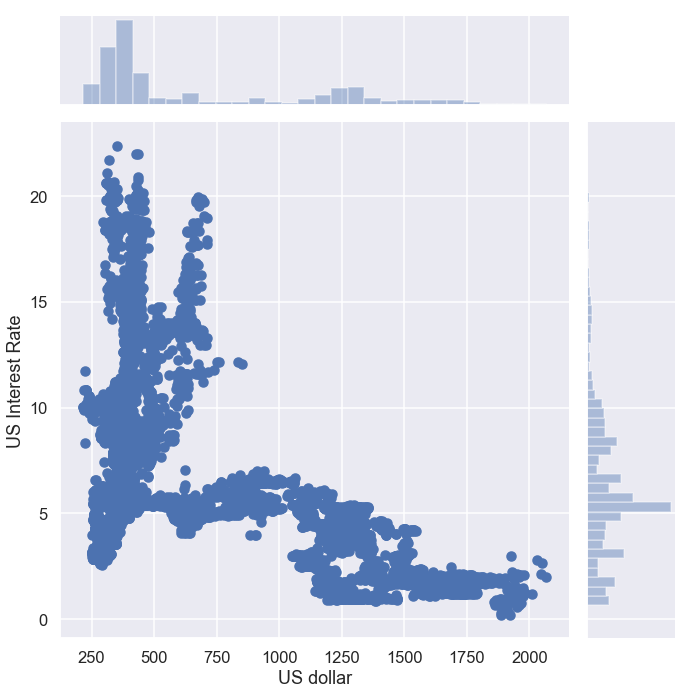

In [26]:
sns.set()
sns.set_context('talk')
sns.jointplot(data['US dollar'],data['US Interest Rate'],height = 10)
plt.show()

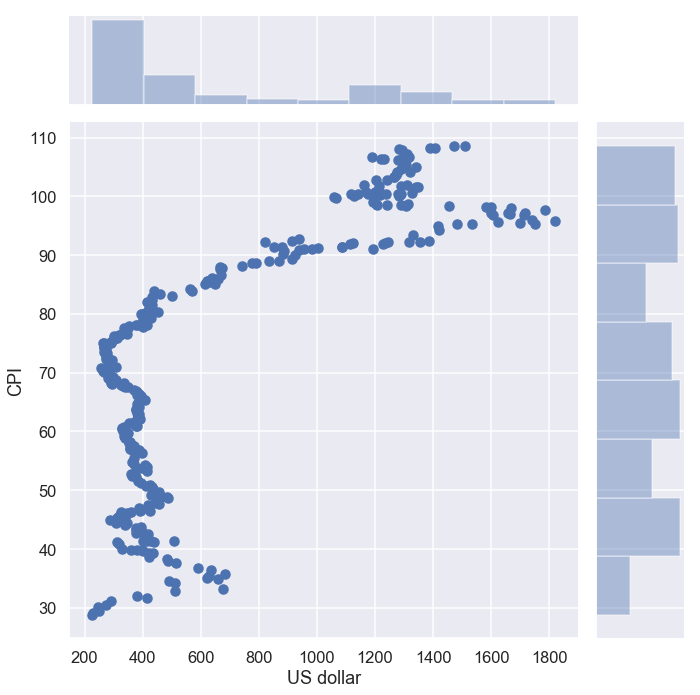

In [27]:
sns.set()
sns.set_context('talk')
sns.jointplot(data['US dollar'],data['CPI'],height = 10)
plt.show()

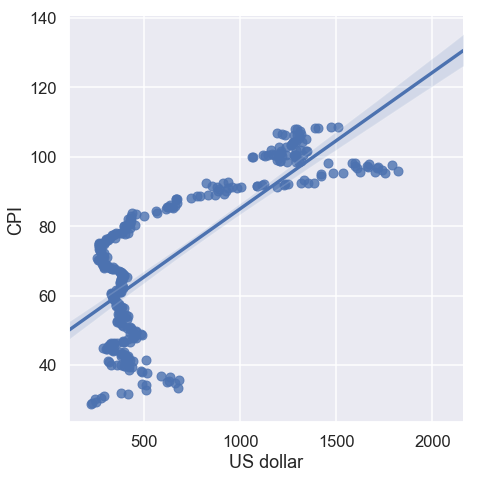

In [28]:
sns.lmplot('US dollar','CPI',data=data,height=7)

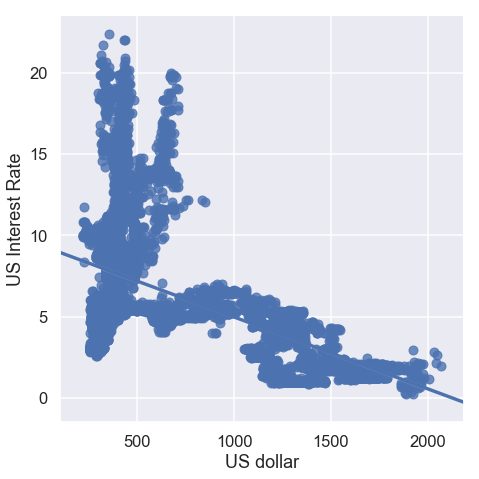

In [29]:
sns.lmplot('US dollar','US Interest Rate',data=data,height=7)

/Users/viveksuresh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/viveksuresh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


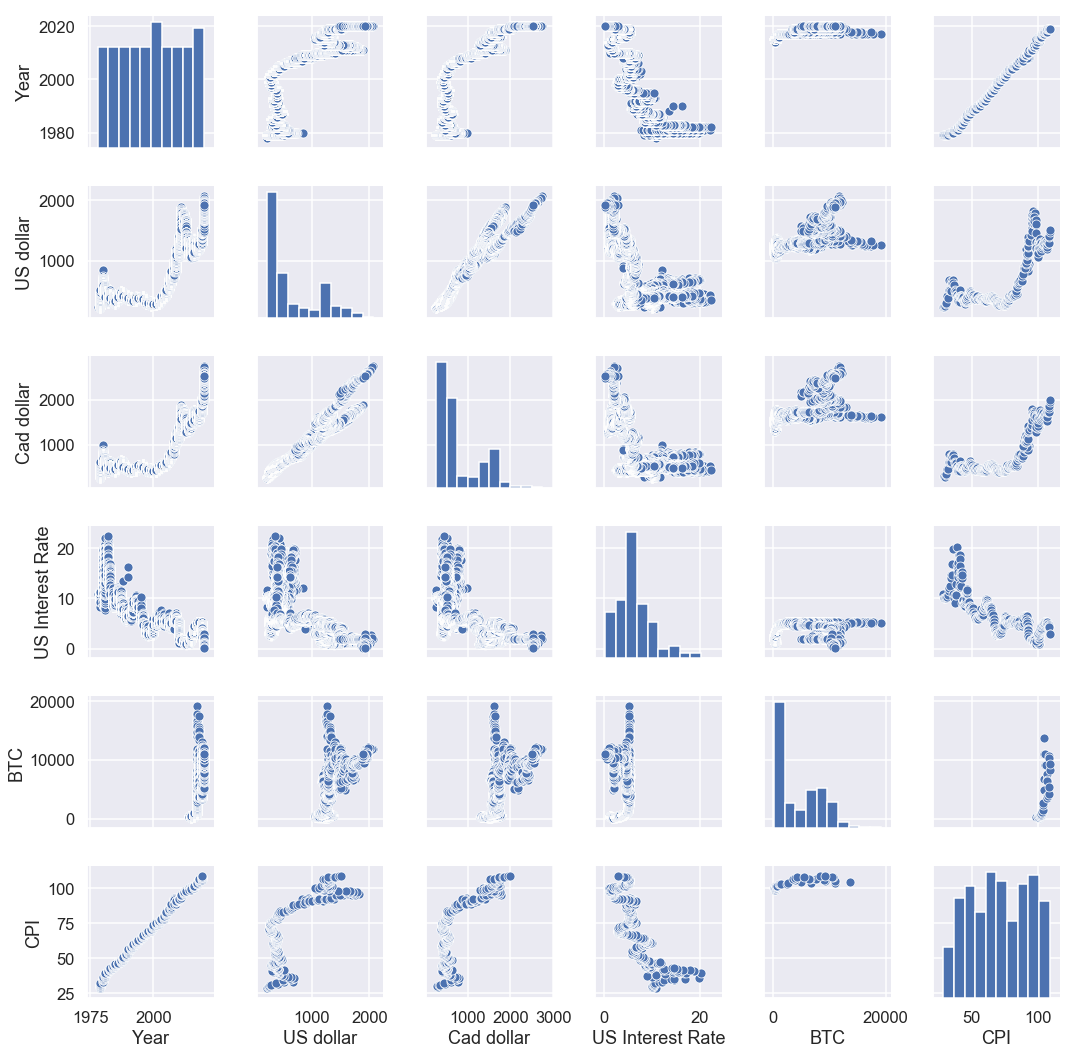

CPU times: user 7.21 s, sys: 130 ms, total: 7.34 s
Wall time: 7.84 s


In [30]:
%%time

sns.pairplot(data)
plt.show()

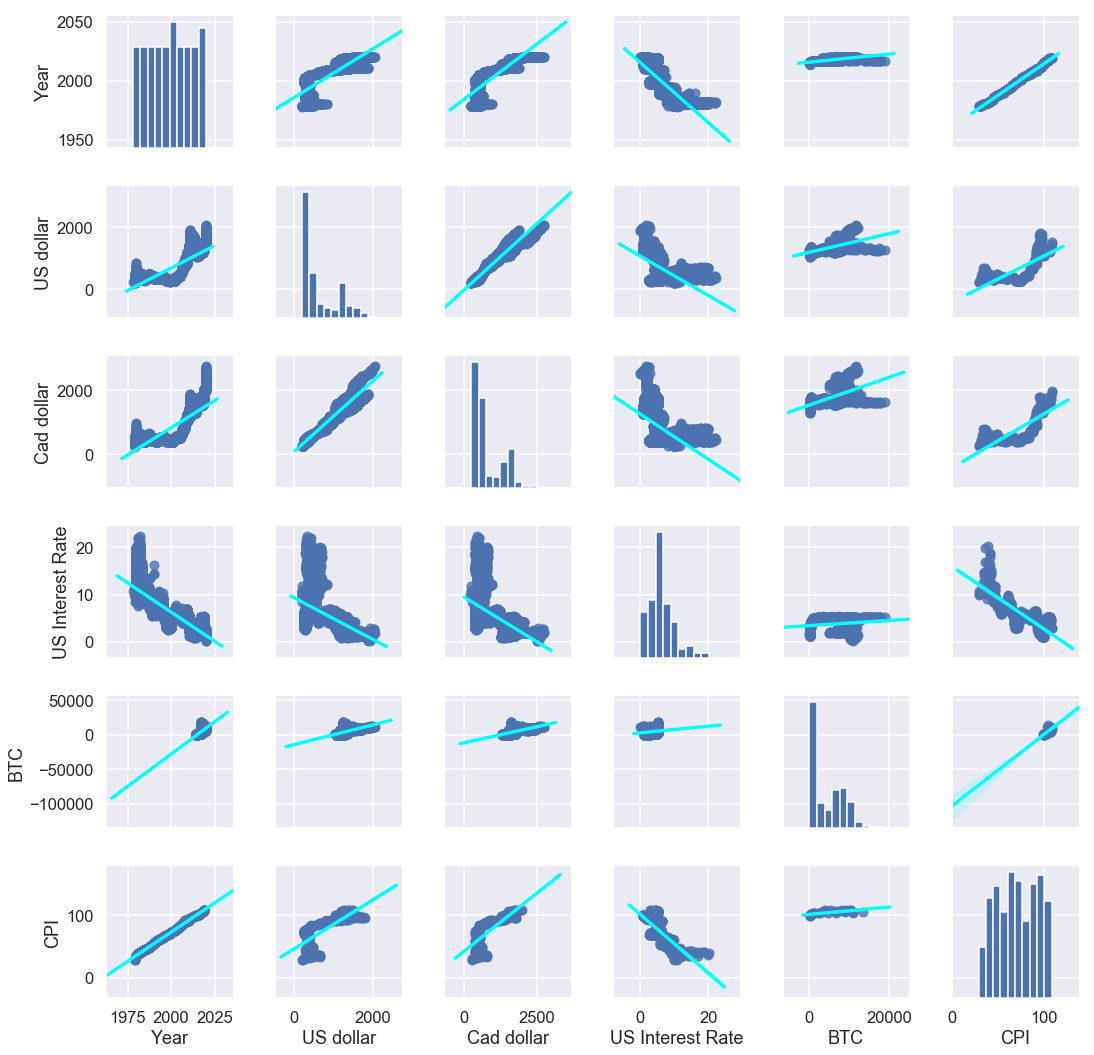

CPU times: user 41.1 s, sys: 647 ms, total: 41.7 s
Wall time: 26.9 s


In [31]:
%%time

sns.pairplot(data, kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()